In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class PositionalEncoding(nn.Module):

    def __init__(self, dim_out: int):
        super().__init__()
        self.dim_out = dim_out
        self.n = 10000

    def forward(self, pos):
        even = torch.arange(0, 2 * self.dim_out / 2, 2).view(1, -1).repeat(pos.size(0), 1)
        odd = torch.arange(1, 2 * self.dim_out / 2 + 1, 2).view(1, -1).repeat(pos.size(0), 1)
        pos = pos.view(-1, 1)
        even = torch.sin(pos / torch.pow(self.n, (even / self.dim_out)))
        odd = torch.cos(pos / torch.pow(self.n, (odd / self.dim_out)))
        out = torch.zeros(pos.shape[0], self.dim_out)
        out[:, 0::2] = even
        out[:, 1::2] = odd
        return out        

In [3]:
d = 100
sequence_length = 200

pe = PositionalEncoding(d)
x = torch.tensor(range(0, sequence_length))
y = pe(x)
print(y.shape)

torch.Size([200, 100])


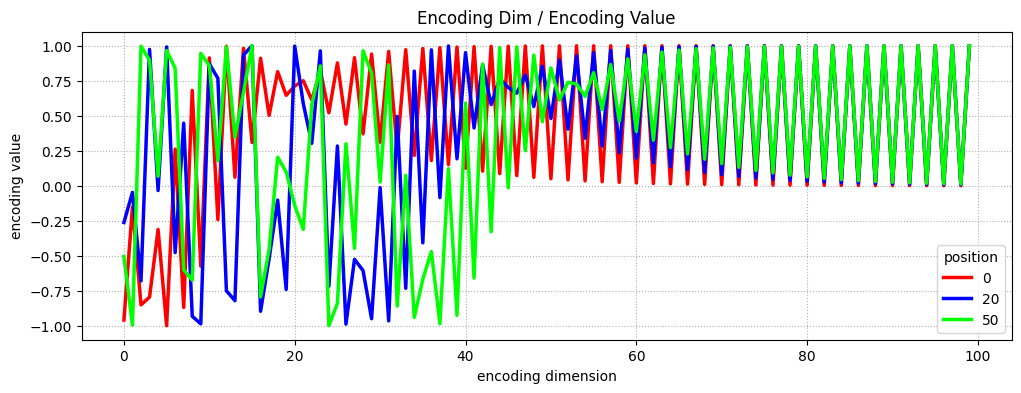

In [82]:
plt.figure(figsize=(12,4))
plt.plot(y[5].numpy(), label="0", linewidth=2.5, c='r')
plt.plot(y[50].numpy(), label="20", linewidth=2.5, c='b')
plt.plot(y[100].numpy(), label="50", linewidth=2.5, c='lime')
plt.xlabel('encoding dimension')
plt.ylabel('encoding value')
plt.legend(title="position")
plt.title('Encoding Dim / Encoding Value')
plt.grid(True, linestyle=':')

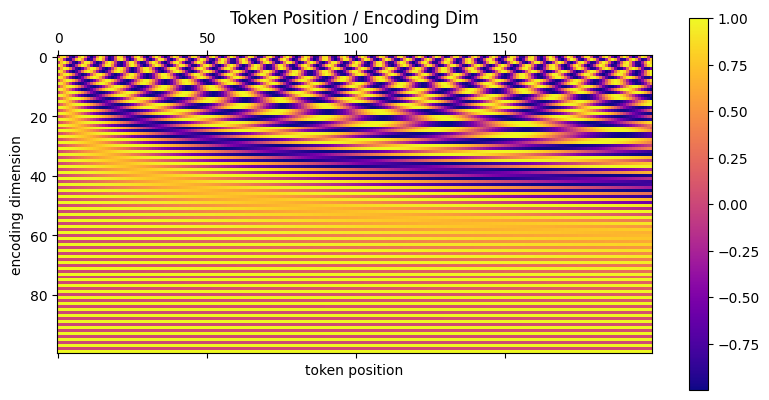

In [81]:
cax = plt.matshow(y.numpy().transpose(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

In [110]:
d = 8
sequence_length = 32

pe = PositionalEncoding(d)
x = torch.tensor(range(0, sequence_length))
y = pe(x)
print(y.shape)

torch.Size([32, 8])


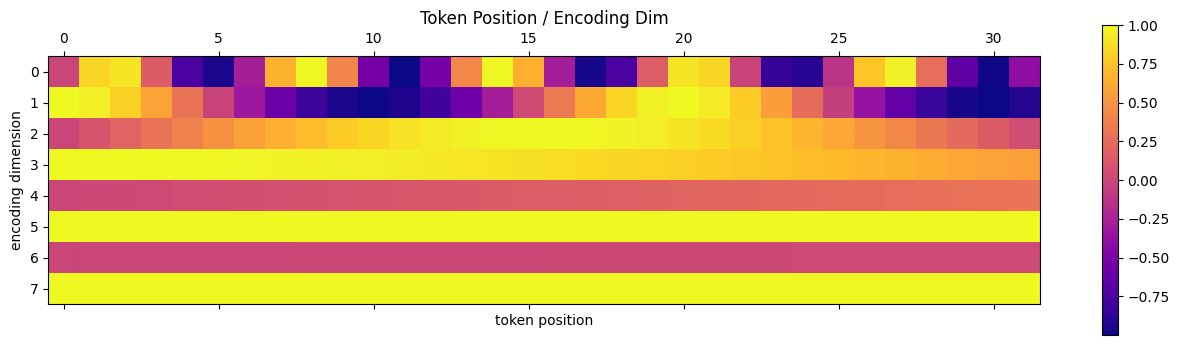

In [111]:
cax = plt.matshow(y.numpy().transpose(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

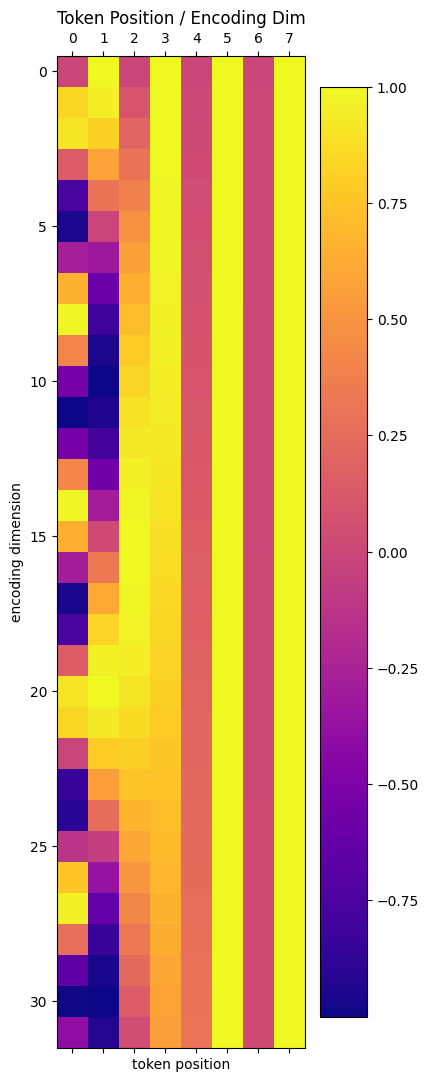

In [112]:
cax = plt.matshow(y.numpy(), cmap='plasma')
plt.gcf().colorbar(cax)
plt.xlabel('token position')
plt.ylabel('encoding dimension')
plt.title('Token Position / Encoding Dim')
plt.show()

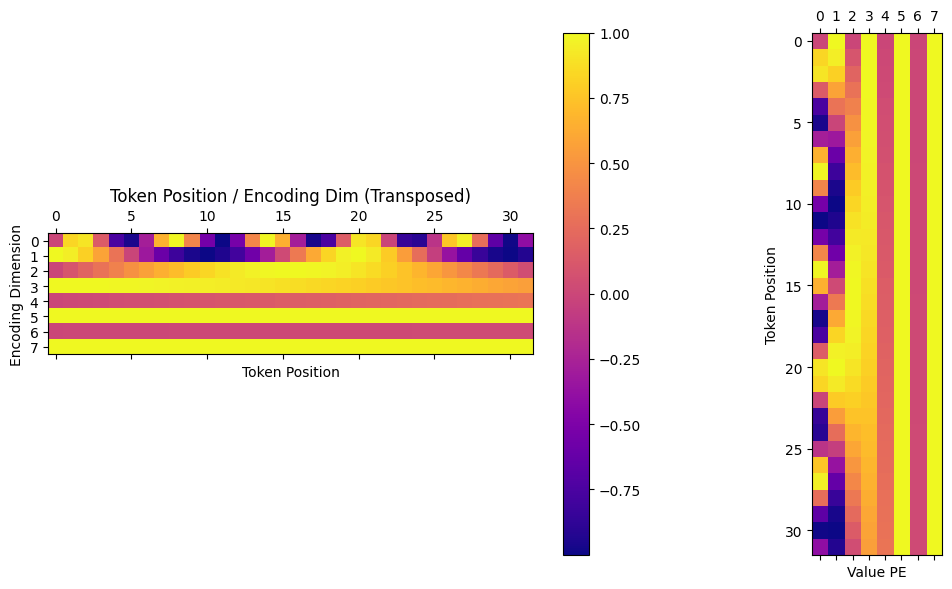

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que y seja um tensor ou array numpy que você já tem

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Cria 1 linha e 2 colunas de subplots

# Primeiro gráfico
cax1 = axs[0].matshow(y.numpy().transpose(), cmap='plasma')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_xlabel('Token Position')
axs[0].set_ylabel('Encoding Dimension')
axs[0].set_title('Token Position / Encoding Dim (Transposed)')

# Segundo gráfico
cax2 = axs[1].matshow(y.numpy(), cmap='plasma')
# fig.colorbar(cax2, ax=axs[1])
axs[1].set_xlabel('Value PE')
axs[1].set_ylabel('Token Position')
axs[1].set_title('')

plt.tight_layout()  # Ajusta o layout para que os subplots não se sobreponham
plt.show()

In [120]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [121]:
device

'cuda'

In [133]:
d = 100
sequence_length = 200

pe = PositionalEncoding(d).to(device)
x = torch.tensor(range(0, sequence_length)).to(device)
y = pe(x)
print(y.shape)

AssertionError: Expected (batch size, max token sequence length, model dimension) got torch.Size([200])

In [123]:
class PositionalEncoding(nn.Module):

    def __init__(self, dim_out: int):
        super().__init__()
        self.dim_out = dim_out
        self.n = 10000

    def forward(self, pos):
        even = torch.arange(0, 2 * self.dim_out / 2, 2).view(1, -1).repeat(pos.size(0), 1)
        odd = torch.arange(1, 2 * self.dim_out / 2 + 1, 2).view(1, -1).repeat(pos.size(0), 1)
        pos = pos.view(-1, 1)
        even = torch.sin(pos / torch.pow(self.n, (even / self.dim_out)))
        odd = torch.cos(pos / torch.pow(self.n, (odd / self.dim_out)))
        out = torch.zeros(pos.shape[0], self.dim_out)
        out[:, 0::2] = even
        out[:, 1::2] = odd
        return out        

In [132]:
class PositionalEncoding(nn.Module):
    def __init__(
        self, model_dimension, dropout_probability=0.1, expected_max_sequence_length=5000
    ):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout_probability)

        position_id = torch.arange(0, expected_max_sequence_length).unsqueeze(1)
        frequencies = torch.pow(
            10000.0,
            -torch.arange(0, model_dimension, 2, dtype=torch.float) / model_dimension,
        )

        positional_encodings_table = torch.zeros(
            expected_max_sequence_length, model_dimension
        )
        positional_encodings_table[:, 0::2] = torch.sin(
            position_id * frequencies
        )  # sine on even positions
        positional_encodings_table[:, 1::2] = torch.cos(
            position_id * frequencies
        )  # cosine on odd positions

        self.register_buffer("positional_encodings_table", positional_encodings_table)

    def forward(self, embeddings_batch):
        assert (
            embeddings_batch.ndim == 3
            and embeddings_batch.shape[-1] == self.positional_encodings_table.shape[1]
        ), f"Expected (batch size, max token sequence length, model dimension) got {embeddings_batch.shape}"

        positional_encodings = self.positional_encodings_table[
            : embeddings_batch.shape[1]
        ]

        # return self.dropout(embeddings_batch + positional_encodings)
        return positional_encodings